# Fashion Recommender System
# Group 4
# ML-AI

In [11]:
# importing all necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model

In [12]:
# Dataset path

training_path = r"D:\Downloads\Fashion-dataset\train"

testing_path = r"D:\Downloads\Fashion-dataset\test"

In [13]:
# Generate image data with real-time data augmentation.
datagen_train = ImageDataGenerator(rescale =1./255, #normalize
                                   rotation_range=30,
                                   horizontal_flip=True)
# Generate image data with real-time data augmentation. 
datagen_test = ImageDataGenerator(rescale =1./255,
                                   rotation_range=30,
                                   horizontal_flip=True)

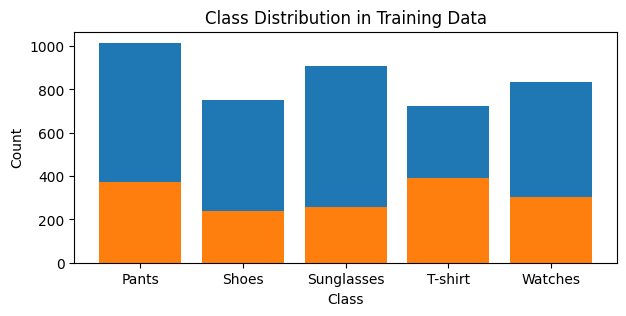

In [15]:
# Exploratory Data Analysis
# Insight

from collections import Counter
import os
import matplotlib.pyplot as plt

def visualize_class_distribution(training_path,testing_path):
    classes1 = os.listdir(training_path)
    classes2 = os.listdir(testing_path)
    class_counts1 = Counter()
    class_counts2 = Counter()
    
    for class_name in classes1:
        class_path1 = os.path.join(training_path, class_name)
        class_counts1[class_name] = len(os.listdir(class_path1))
    for class_name in classes2:
        class_path2 = os.path.join(testing_path, class_name)
        class_counts2[class_name] = len(os.listdir(class_path2))

    plt.figure(figsize=(7, 3))
    plt.bar(class_counts1.keys(), class_counts1.values())
    plt.bar(class_counts2.keys(), class_counts2.values())
    plt.title('Class Distribution in Training Data')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

visualize_class_distribution(training_path,testing_path)


In [6]:
# uploading data throughout the directory

training_set = datagen_train.flow_from_directory(training_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')
test_set = datagen_test.flow_from_directory(testing_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')


Found 4235 images belonging to 5 classes.
Found 1559 images belonging to 5 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN & ANN model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

model.add(Dense(5, activation='softmax')) #multiclass features

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# imbalance dataset for which we use 'sparse_categorical_crossentropy'

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

In [7]:

# history=model.fit(training_set, batch_size=100, epochs=5, validation_data=test_set)


Epoch 1/5


71/71 [==============================] - 326s 5s/step - loss: 1.1906 - accuracy: 0.5941 - val_loss: 0.8042 - val_accuracy: 0.7224
Epoch 2/5
71/71 [==============================] - 222s 3s/step - loss: 0.6145 - accuracy: 0.7863 - val_loss: 0.5758 - val_accuracy: 0.7975
Epoch 3/5
71/71 [==============================] - 214s 3s/step - loss: 0.4666 - accuracy: 0.8412 - val_loss: 0.5404 - val_accuracy: 0.7837
Epoch 4/5
71/71 [==============================] - 214s 3s/step - loss: 0.4130 - accuracy: 0.8632 - val_loss: 0.4634 - val_accuracy: 0.8361
Epoch 5/5
71/71 [==============================] - 222s 3s/step - loss: 0.3606 - accuracy: 0.8786 - val_loss: 0.4685 - val_accuracy: 0.8414


In [16]:
# from keras.models import save_model

# # Save the entire model to a file
# model.save("D:\Downloads\Model\model3.h5")


In [ ]:
# Load the pre-trained model
model = load_model("D:\Downloads\model3.h5")

In [ ]:
# # Evaluate the model on the test set
# eval_result = model.evaluate(test_set)

# # Print the evaluation result
# print("Test Loss:", eval_result[0])
# print("Test Accuracy:", eval_result[1])

# # Plot the training history (optional)
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Feature Extraction from our Dataset

In [11]:
# Extract features using the penultimate layer
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output)

# Feature extraction loop for your existing dataset
feature_vectors = []
for i in range(len(training_set.filenames)):
    img_path = os.path.join(r"D:\Downloads\Fashion-dataset\train", training_set.filenames[i])
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255., axis=0)
    feature_vector = feature_extraction_model.predict(img_array)
    feature_vectors.append((training_set.filenames[i], feature_vector.flatten()))

1/1 [==============================] - 0s 20ms/step


In [12]:
# Save extracted features to a file
np.save('extracted_features2.npy', np.array(feature_vectors, dtype=object))

In [14]:
# Load the extracted features
loaded_features = np.load('extracted_features2.npy', allow_pickle=True)


# Testing of image

In [104]:
test_image_path = r"D:\Downloads\Test_images\shoes2.jpg"

In [105]:
# Extract features for the testing image

test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_arr = image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image_arr / 255., axis=0)
test_image_features = feature_extraction_model.predict(test_image_arr)


1/1 [==============================] - 0s 10ms/step


In [106]:
# finding similarities between test image and dataset

similarities = []
for filename, feature_vector in loaded_features:
    similarity = np.dot(test_image_features, feature_vector.T) / (np.linalg.norm(test_image_features) * np.linalg.norm(feature_vector))
    similarities.append((filename, similarity))


In [107]:
# Sort images by similarity
similarities.sort(key=lambda x: x[1], reverse=True)

# Plotting recommendations for our test image 

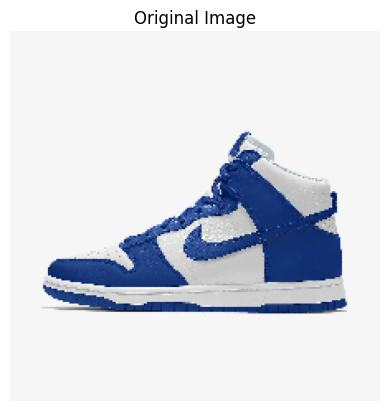

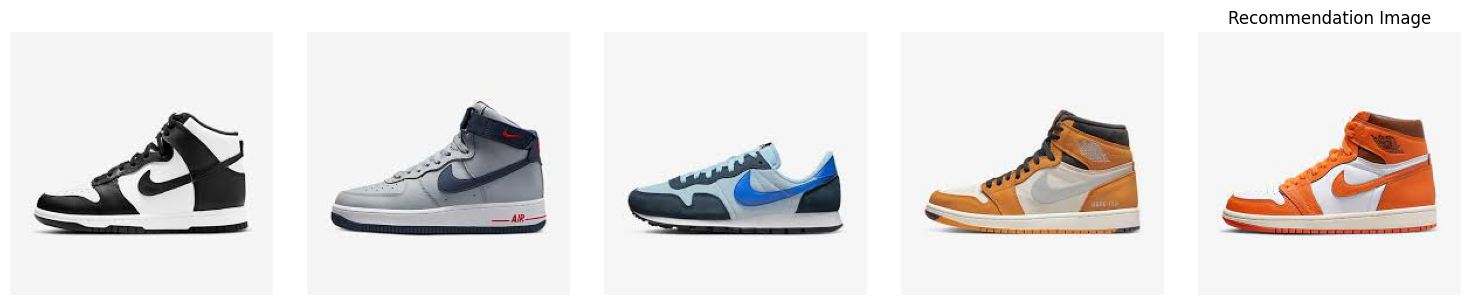

In [108]:
# Visualization code (unchanged)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming similarities is already sorted
top_similarities = similarities[:5]

# Display the original image
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")
plt.show()
# Plot the 5 most similar images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
plt.title("Recommendation Image")
for i, (filename, similarity) in enumerate(top_similarities):
    img_path = os.path.join(r"D:\Downloads\Fashion-dataset\train", filename)
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
  
    axes[i].axis('off')

plt.tight_layout()
plt.show()
